In [1]:
import pandas as pd
import numpy as np

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_25444\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('marketing_data/marketing_campaign.csv',  delimiter='\t')
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
df = df.dropna()

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
def date_time(df, Dt_Customer):
    '''making the date time column numeric'''
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
    return df
df = date_time(df, 'Dt_Customer')
df.dtypes


ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [6]:
def education_clean(df, Education):
    '''turning the education column into numerical'''
    df['Education'] = np.where(df['Education'] == 'Graduation', 0,
                               np.where(df['Education'] == 'PhD', 1,
                                        np.where(df['Education'] == 'Master', 2,
                                                 np.where(df['Education'] == 'Basic', 3,
                                                          np.where(df['Education'] ==  '2n Cycle', 4, 0)))))
    return df

df = education_clean(df,'Education')
                                

In [7]:
df['Education'].value_counts()

Education
0    1116
1     481
2     365
4     200
3      54
Name: count, dtype: int64

In [8]:
def marital_clean(df, Marital_Status):
    '''turning the marital column into numerical data'''
    df['Marital_Status'] = np.where(df['Marital_Status'] == 'Single', 0,
                                    np.where(df['Marital_Status'] == 'Married', 1,
                                             np.where(df['Marital_Status'] == 'Together', 2,
                                                      np.where(df['Marital_Status'] == 'Divorced', 3,
                                                               np.where(df['Marital_Status'] == 'Widow', 4,
                                                                        np.where(df['Marital_Status'] == 'Alone', 0,
                                                                                 np.where(df['Marital_Status'] == 'Absurd', 0,
                                                                                          np.where(df['Marital_Status'] == 'YOLO', 0, 1))))))))
    return df
df = marital_clean(df,'Marital_Status')                                                                                          
                                                                                        
                                                               
                                                               
                                    

In [9]:
df['Marital_Status'].value_counts()

Marital_Status
1    857
2    573
0    478
3    232
4     76
Name: count, dtype: int64

In [10]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0,0,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,0,0,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,0,2,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,0,2,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,1,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,1,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,1,2,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,0,3,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,2,2,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [11]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                       int32
Marital_Status                  int32
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

To handle nulls I used the dropna function on the data frame from the start before preprocessing the data. Then I startadized the data values when I turned the columns into numerica by grouping nulls and other weird values into the biggest value group. So fo education this would be 'graduation' and for marital this would be 'married'. I also combined values like 'alone' and 'single' under one standardized value. There was not much data that needed to be cleaned because most of the columns were in numeric format. All I did was turn the categorical columns into numeric using np.where and turning the date and time data into a date time data type so I can run models on it.

## Q2

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

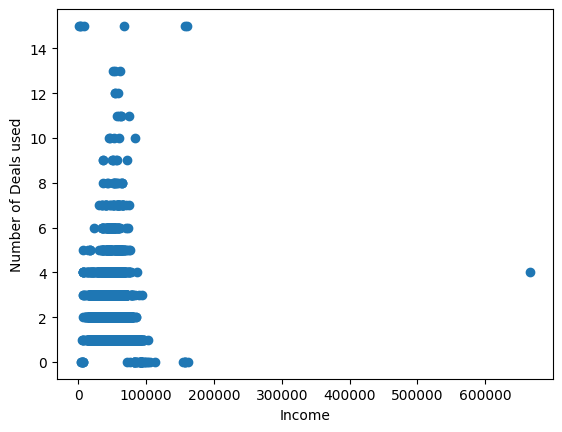

In [26]:
X = df.drop(['Complain'], axis =1)
y = df['Complain']
plt.scatter(X['Income'],X['NumDealsPurchases'])

plt.xlabel('Income')
plt.ylabel('Number of Deals used')
plt.show()

In [27]:
inertias = []
distortions = []

for k in range(1,10):
    # build and fit the model
    model = KMeans(n_clusters=k).fit(X)

    # Distortion is the average of the squared
    # distance from the cluster center
    # to the data points in Euclidean space
    # Euclidean space = standard 2+ dimensional space
    distance = cdist(X, model.cluster_centers_,
                                  'euclidean')
    distortion = sum(np.min(distance,axis =1))/X.shape[0]
    distortions.append(distortion)

    #inertia is calculated by measuring the distance between
    # each data point and the centroid and summing
    # the squared across the cluster. A good model
    # is one with low intertia or distortion
    # AND a low number of clusters
    inertia = model.inertia_
    inertias.append(inertia)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)